In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
global_comms = pickle.load(open("test_2_output.pickle", "rb"))

In [3]:
len(global_comms)

12292

In [4]:
comms_by_len = {}
for comm_id, comm in global_comms.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

In [5]:
comms_by_len.keys()

dict_keys([4096, 1, 2])

In [6]:
len(comms_by_len[4096])

4

In [7]:
for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms[comm].check_consistency()}")
    #global_comms[comm].check_consistency()
    print(f"{global_comms[comm].get_completed_opcounts()[0]} All Operations:")
    durations = global_comms[comm].get_completed_durations(fillMissing=True)
    for iop, op in enumerate(global_comms[comm].get_operations(allowUneven=True)):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")



0xa1d1e623c23ac2c4
Consistent: True
72 All Operations:
Operation 0: AllGather count: 131072 dtype: 9 Times: max 455.6229999870993 ms min 282.3369999532588 ms mean 385.01607788078474 ms
Operation 1: AllGather count: 131072 dtype: 9 Times: max 1170.1269999612123 ms min 168.7800000072457 ms mean 758.3834721675018 ms
Operation 2: AllGather count: 131072 dtype: 9 Times: max 767.3029999714345 ms min 245.18099997658283 ms mean 586.754221191228 ms
Operation 3: AllGather count: 131072 dtype: 9 Times: max 514.3260000040755 ms min 369.31199999526143 ms mean 377.4559841311955 ms
Operation 4: AllGather count: 131072 dtype: 9 Times: max 476.10699996585026 ms min 372.4279999732971 ms mean 424.8044638670265 ms
Operation 5: AllGather count: 131072 dtype: 9 Times: max 379.51499997870997 ms min 367.5340000190772 ms mean 375.9864091793901 ms
Operation 6: AllGather count: 131072 dtype: 9 Times: max 475.95500003080815 ms min 372.5010000052862 ms mean 425.0443200681744 ms
Operation 7: AllGather count: 131072

In [8]:
stall_comm = global_comms['0x688750e7f55f9410']
print(stall_comm.local_to_global_rank_map[0])

0


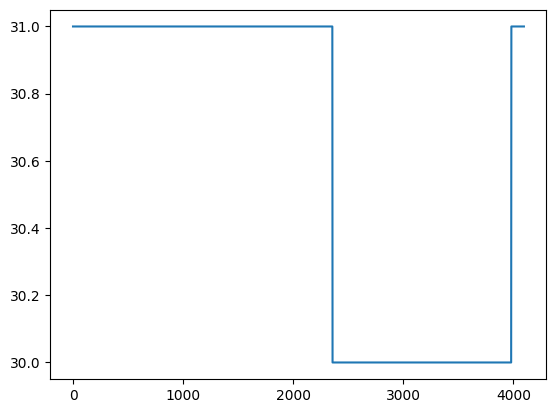

In [9]:
plt.plot(stall_comm.get_completed_opcounts())

In [10]:
opcounts = stall_comm.get_pending_opcounts()
for i, count in enumerate(opcounts):
    if count > 0:
        print(f"Local {i} (global {stall_comm.local_to_global_rank_map[i]}) has {count} pending operations.")
        print(stall_comm.get_local_communicator(i))
        print(stall_comm.get_local_communicator(i).pending_operations)

In [11]:
uncounted_stalls = stall_comm.get_proxy_stall_counts_on_operations()
uncounted_stalls

array([[ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.],
       [ 0.,  0.,  0., ...,  0.,  0., 40.]], shape=(4096, 31))

In [12]:
stall_comm.trace_proxy_stalls(allowUneven=True)

Uncounted stalls remaining: 98880.0
Tracing proxy stall in communicator 0x688750e7f55f9410 at local rank 0, operation index 30.
Stall on channel 5 starting on rank 0 (Global 0).
Mismatch in recvtail proxy output from rank 1366 (Global 2732) on rank 1370 (Global 2740).
Global communicator 0x688750e7f55f9410 operation ReduceScatter seq_num 30.
0x7ff5ee767018 [0-0|60| coll:3 comm:0x366e1e00 [SEND] dtype:9 redOp:0 proto:2  nb:1048576 ns:16380 p:5936 t:5936 r:16380, d:5928   myrank:1366 peer:1370 chan:5 tail:497334 recvtail:497336 reg:0 connSz:0(retries:462554911)]Traced: True
0x7ff5ee7877a8 [0-3|60| coll:3 comm:0x1b901e20 [RECV] dtype:9 redOp:0 proto:2  nb:1048576 ns:16380 p:5928 t:5928 r:5928, d:5920   myrank:1370 peer:1366 chan:5 tail:0 recvtail:497328 reg:0 connSz:32768(retries:671556606)]Traced: False
Mismatch in recvtail proxy output from rank 1368 (Global 2736) on rank 1372 (Global 2744).
Global communicator 0x688750e7f55f9410 operation ReduceScatter seq_num 30.
0x7ff5ee37ca78 [0-2|6

In [13]:
print(global_comms['0xc0a6e4e99db3f284'].local_communicators[0].completed_operations)

KeyError: '0xc0a6e4e99db3f284'

In [ ]:
global_comms['0xc0a6e4e99db3f284'].get_completed_durations()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
%matplotlib inline

In [ ]:
def plot_op_times(comm, opstart=0, opend=None):
    completed_ops = comm.get_completed_durations()
    figure, ax = plt.subplots(figsize=(12, 6))
    for op in range(completed_ops.shape[1])[opstart:opend]:
        ax.plot(np.arange(completed_ops.shape[0]), completed_ops[:,op], label=f"op {op}, {comm.local_communicators[0].completed_operations[op].op_type}")
    ax.set_xlabel("rank")
    ax.set_ylabel("duration (ms)")
    ax.legend()

In [ ]:
timeout_comm = global_comms['0xc0a6e4e99db3f284']

In [ ]:
durations = timeout_comm.get_completed_durations()

In [ ]:
durations.min()

In [ ]:
timeout_comm.local_to_global_rank_map[durations.argmin()]

In [ ]:
for i in range(len(durations)):
    if durations[i] < 500000:
        print(f"Rank {i} has a duration of {durations[i]} ms")
        print(f"Global Rank {timeout_comm.local_to_global_rank_map[i]}")

In [ ]:
plot_op_times(timeout_comm)

In [ ]:
other_half = global_comms['0x6b35aecc33f079ef']

In [ ]:
other_half.get_completed_durations().min() // 1000.0

In [ ]:
plot_op_times(other_half)

In [ ]:
ag1 = global_comms['0xbc8a3ad231751b7']

In [ ]:
plot_op_times(ag1,opstart=9, opend=10)

In [ ]:
global_comms_1 = pickle.load(open("test_1_output.pickle", "rb"))

In [ ]:
global_comms_6 = pickle.load(open("test_6.pickle", "rb"))
comms_by_len = {}
for comm_id, comm in global_comms_6.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms_6[comm].check_consistency()}")
    print(f"{global_comms_6[comm].get_completed_opcounts()[0]} Completed Operations:")
    durations = global_comms_6[comm].get_completed_durations()
    #print(global_comms[comm].get_completed_operations())
    for iop, op in enumerate(global_comms_6[comm].get_completed_operations()):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")
    print("pending opcounts:")
    print(global_comms_6[comm].get_pending_opcounts())

In [ ]:
reduce_comm = global_comms_6['0x4ed83dba7f3d55a1']
plot_op_times(reduce_comm, opstart=0, opend=10)

In [ ]:
len(comms_by_len[4096])

In [ ]:
global_comms_working = pickle.load(open("working_1.pickle", "rb"))
comms_by_len = {}
for comm_id, comm in global_comms_working.items():
    if comm.size not in comms_by_len:
        comms_by_len[comm.size] = []
    comms_by_len[comm.size].append(comm_id)

for comm in comms_by_len[4096]:
    print(comm)
    print(f"Consistent: {global_comms_working[comm].check_consistency()}")
    print(f"{global_comms_working[comm].get_completed_opcounts()[0]} Completed Operations:")
    durations = global_comms_working[comm].get_completed_durations()
    #print(global_comms[comm].get_completed_operations())
    for iop, op in enumerate(global_comms_working[comm].get_completed_operations()):
        print(f"Operation {iop}: {op.op_type} count: {op.count} dtype: {op.dtype} Times: max {durations[:, iop].max()} ms min {durations[:, iop].min()} ms mean {durations[:, iop].mean()} ms")
    print("pending opcounts:")
    print(global_comms_working[comm].get_pending_opcounts())

In [ ]:
reduce_comm = global_comms_working['0x430365659d9cd9ef']
plot_op_times(reduce_comm, opstart=0, opend=10)